# NAME: AKSHAT GOYAL

# Data Science and Business Analytics Internship at the Sparks Foundation

In [4]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
#importing dataset to the dataframe
url = "http://bit.ly/w-data"
A=pd.read_csv(url)

In [7]:
A.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
#from the obsertvation the above dataset contains the two columns hours & scores

# Data Frame Exploration

In [11]:
A.describe() # containg the basic statics of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
A.shape

(25, 2)

# Checking for Missing Data

In [17]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [18]:
# since all the columns has all the 25 enteries so their is no missing 
# value in the data frame

In [21]:
A.isnull().sum()

Hours     0
Scores    0
dtype: int64

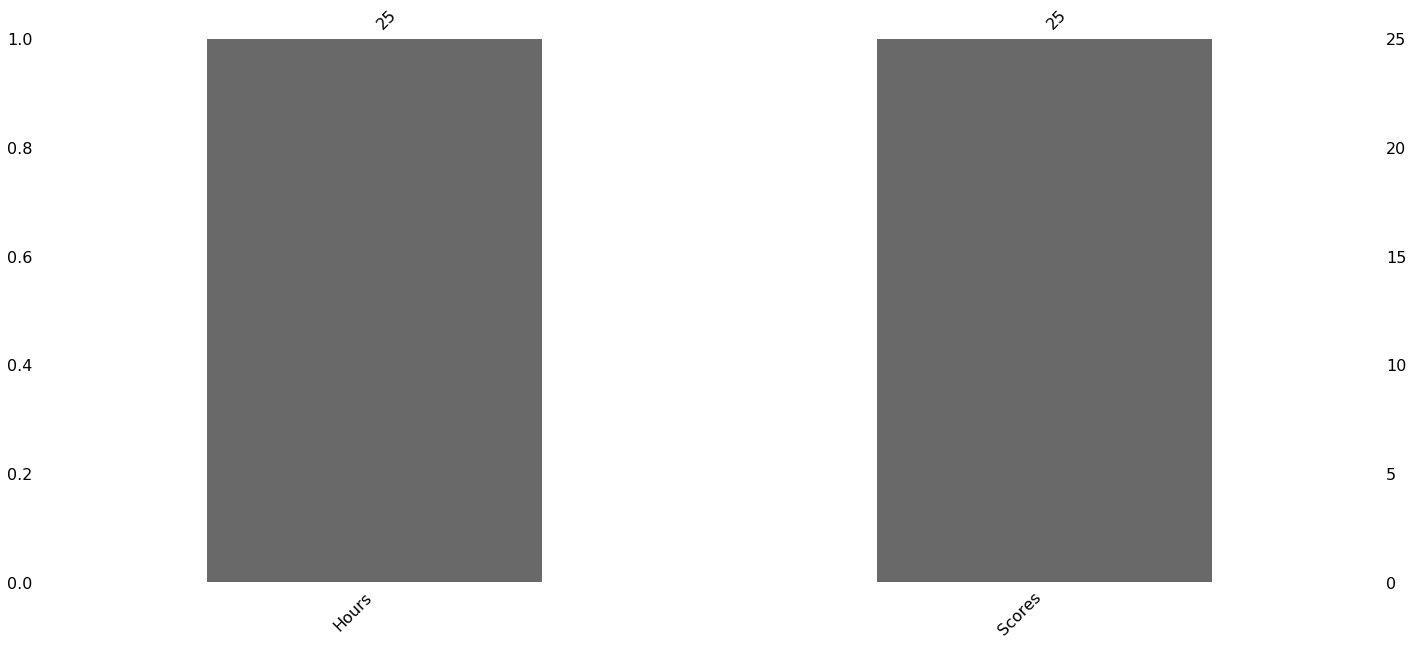

In [23]:
import missingno as mo
mo.bar(A)

# Detecting Outliers and Handling them

In [27]:
#Detecting outliers
Q1 = A.quantile(0.25)
Q3 = A.quantile(0.75)
IQR = Q3 - Q1                         
print(IQR)

Hours      4.7
Scores    45.0
dtype: float64


In [28]:
Lower_Whisker = Q1 - 1.5 *IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

Hours     -4.35
Scores   -37.50
dtype: float64 Hours      14.45
Scores    142.50
dtype: float64


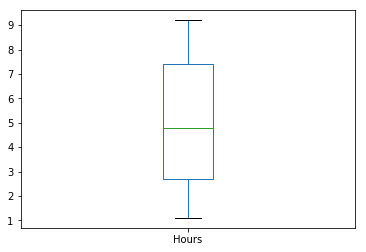

In [52]:
A.Hours.plot(kind='box')
plt.show()

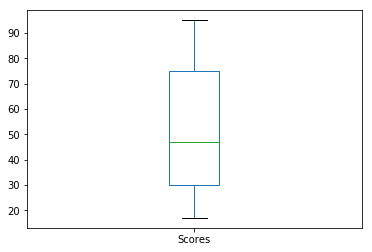

In [47]:
A.Scores.plot(kind='box') # box plot using pandas
plt.show()

In [53]:
# The abopve Box plots confirms that their is no outlier in the data set 
# as their are no vvalues that lie outside of the lower 7 the upper whisker

# Exploratery Data Analysis

In [55]:
# since both the columns inside the Data frame are Continioues ina nature
# so we should use distplot for better result

In [64]:
# Independent Exploratery Data Analysis

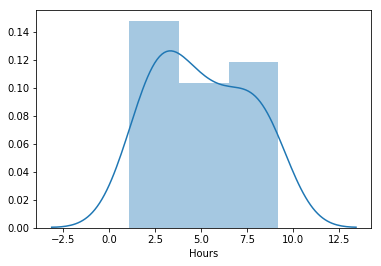

In [61]:
sb.distplot(A.Hours)  # distplot using seaborn 
plt.show()

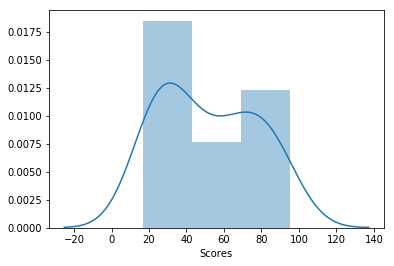

In [63]:
sb.distplot(A.Scores)  # distplot using seaborn 
plt.show()
plt.show()

In [65]:
#Combined Exploratery Data Analysis

In [66]:
#since both the variable are continioues in nature thats why we use scateer plot

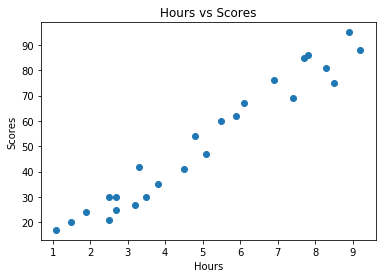

In [71]:
plt.scatter(A["Hours"],A["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

# Model Building

In [85]:
X = A.iloc[:,0].values  
Y = A.iloc[:,-1].values

In [88]:
#Reshaping data
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

In [99]:
#Spiltting data into 80% Training data and 20% Testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [100]:
#Impprting & fitthing the data set on to the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)

In [101]:
# Now Making Predictions ut of the Linear Regression model

In [103]:
pred= model.predict(xtest)

In [104]:
pred

array([[76.97173986],
       [27.17172289],
       [74.09866196],
       [27.17172289],
       [69.31019879]])

# Model Evaluation

In [106]:
m = model.coef_   #Linear regression line slope
c = model.intercept_  #Linear regression line y-intercept

In [107]:
predicted_line = (m*X) + c

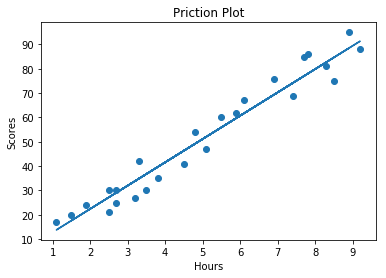

In [110]:
# Ploting the regression line
plt.scatter(X,Y)
plt.plot(X,predicted_line)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Priction Plot")
plt.show()

# Checking error of prediction and R2 Score

In [121]:
from sklearn.metrics import mean_absolute_error
print("The Mean Absolute Error of the model is",mean_absolute_error(ytest,pred))
print("Accuracy R2 Score of model is",model.score(xtest,ytest))

The Mean Absolute Error of the model is 5.763344662175544
Accuracy R2 Score of model is 0.9452422164650991


In [123]:
# & hence the model ceated is 94.52 %

# Conclusion